I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

In [ ]:
from sympy import integrate, init_printing
init_printing(use_latex="mathjax")
from sympy.abc import x,a
from sympy import cos

I1 = integrate(1/(cos(x)-cos(a)) , (x,0,a))
I1

⎧                                               1                             
⎪                                        -∞ + ──────                          
⎪                                                ⎛a⎞                          
⎪                                             tan⎜─⎟                          
⎪                                                ⎝2⎠                          
⎪                                                                             
⎨   ⎛    ⎛a⎞⎞    ⎛a⎞      ⎛    ⎛a⎞⎞      ⎛   ⎛a⎞⎞    ⎛a⎞      ⎛   ⎛a⎞⎞        
⎪log⎜-tan⎜─⎟⎟⋅tan⎜─⎟   log⎜-tan⎜─⎟⎟   log⎜tan⎜─⎟⎟⋅tan⎜─⎟   log⎜tan⎜─⎟⎟        
⎪   ⎝    ⎝2⎠⎠    ⎝2⎠      ⎝    ⎝2⎠⎠      ⎝   ⎝2⎠⎠    ⎝2⎠      ⎝   ⎝2⎠⎠        
⎪─────────────────── + ──────────── - ────────────────── - ─────────── + ∞⋅sig
⎪         2                   ⎛a⎞             2                   ⎛a⎞         
⎪                        2⋅tan⎜─⎟                            2⋅tan⎜─⎟         
⎩                             ⎝2⎠                   

Any numerical evaluation of the integral as is would fail bacause in the last integral ($I1$) we can see that the integral diverge

Tenemos que:
$$
Z=\frac{T}{T_{0}}=\frac{2}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

In [ ]:
from scipy import interpolate
from scipy.misc import derivative
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def T(α):
    k=np.sin(α/2)

    return (2/np.pi)*integrate.quad(lambda ϕ:(1)/(np.sqrt(1-k**2*np.sin(ϕ)**2)),0,np.pi/2)[0]


In [ ]:
y=np.linspace(0,np.pi/2,20)
y

array([0.        , 0.08267349, 0.16534698, 0.24802047, 0.33069396,
       0.41336745, 0.49604095, 0.57871444, 0.66138793, 0.74406142,
       0.82673491, 0.9094084 , 0.99208189, 1.07475538, 1.15742887,
       1.24010236, 1.32277585, 1.40544935, 1.48812284, 1.57079633])

In [ ]:
v = np.zeros(20)
for i in range(0, 20):
  v[i]=T(y[i])
v

array([1.        , 1.00042735, 1.00171141, 1.00385824, 1.00687804,
       1.01078527, 1.01559889, 1.02134257, 1.02804509, 1.03574074,
       1.04446986, 1.05427951, 1.06522421, 1.07736699, 1.09078049,
       1.10554846, 1.12176752, 1.13954935, 1.15902345, 1.1803406 ])

In [ ]:
θ= y*(180/np.pi)
TABLA={"α radianes": y,   
         "α grados" : θ,
       "T/T_0": v }  
         

In [ ]:
df = pd.DataFrame(TABLA)
df 

,α radianes,α grados,T/T_0
0,0.000000,0.000000,1.000000
1,0.082673,4.736842,1.000427
2,0.165347,9.473684,1.001711
3,0.248020,14.210526,1.003858
4,0.330694,18.947368,1.006878
5,0.413367,23.684211,1.010785
6,0.496041,28.421053,1.015599
7,0.578714,33.157895,1.021343
8,0.661388,37.894737,1.028045
9,0.744061,42.631579,1.035741


No handles with labels found to put in legend.


Text(0.5, 0, '$\\alpha$ [rad]')

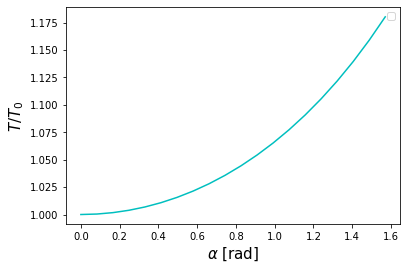

In [ ]:
#and make a plot with the two columns
plt.plot(y,v,'c-' )

plt.legend()
plt.ylabel('${T}/{T_0} $ ' ,size=15)
plt.xlabel(r'$\alpha$ [rad]' ,size=15)



No handles with labels found to put in legend.


Text(0.5, 0, '$\\alpha$ [grad]')

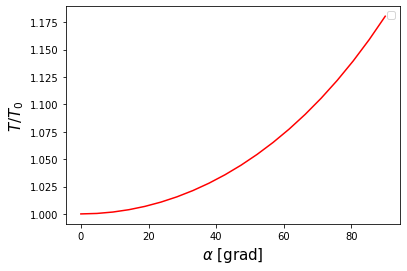

In [ ]:
plt.plot(θ,v,'r-' )

plt.legend()
plt.ylabel('${T}/{T_0} $ ' ,size=15)
plt.xlabel(r'$\alpha$ [grad]' ,size=15)

Explein the result when $\alpha=0$

$\frac{T}{T_{0}}=1$ when $\alpha=0$ because $T_0$ is for small amplitudes so $lim_{\alpha \to 0}(T(\alpha))= T_0$

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$
2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [ ]:
λ=([2,4])


In [ ]:
A_diag = np.diag(λ)
A_diag                 

array([[2, 0],
       [0, 4]])

In [ ]:
D = np.diag(np.sqrt(λ))
D

array([[1.41421356, 0.        ],
       [0.        , 2.        ]])

In [ ]:
def orthogonal(θ):
    return np.array( [[np.cos(θ) ,np.sin(θ)],
                      [-np.sin(θ),np.cos(θ)]]   )

In [ ]:
np.random.seed(1007322018)
β=np.random.rand()
β




0.39108273269266725

In [ ]:
R=orthogonal(β)
R

array([[ 0.92449688,  0.38118962],
       [-0.38118962,  0.92449688]])

In [ ]:
U=orthogonal(np.pi/4)
U

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
#1.Build a matrix  𝑌   2×2  with the following conditions
Y=np.dot( np.dot(R, D), U.transpose())
Y

array([[ 1.46358041, -0.38541334],
       [ 0.9262464 ,  1.68862564]])

In [ ]:
#2.Build the matrix  𝐴
A=np.dot(Y.transpose(),Y)
A

array([[3., 1.],
       [1., 3.]])

In [ ]:
λ,V=np.linalg.eig( A )

In [ ]:
# check that has the proper eigenvalues and eigenvectors
print('A eigenvalues',λ)
print('A eigenvectors', V)

A eigenvalues [2. 4.]
A eigenvectors [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
